In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy.io.shapereader as shpreader
import numpy as np
import gstools as gs
import pyvista as pv
import meshio
import meshzoo
import matplotlib.tri as tri
import rasterio
import plotly.graph_objects as go
from rasterio.plot import show_hist
from cartopy.io import shapereader
from rasterio.plot import show
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.offsetbox import AnchoredText
from shapely.geometry import Point
from cartopy.feature import ShapelyFeature
from PIL import Image

# 

# Cargamos todos los raster.tiff hechos en R

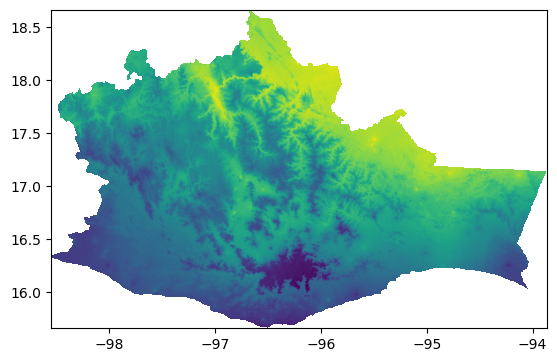

<Axes: >

In [2]:
im_2 = rasterio.open('area_cor2.tif')
plt.imshow(im_2.read(1), cmap='pink')
show(im_2)

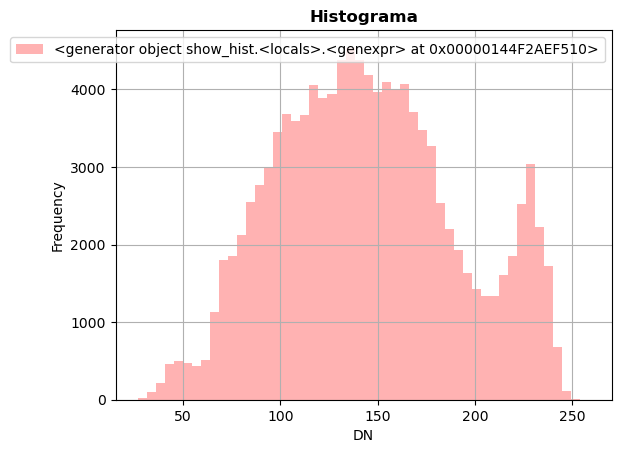

In [3]:
show_hist(im_2, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histograma")

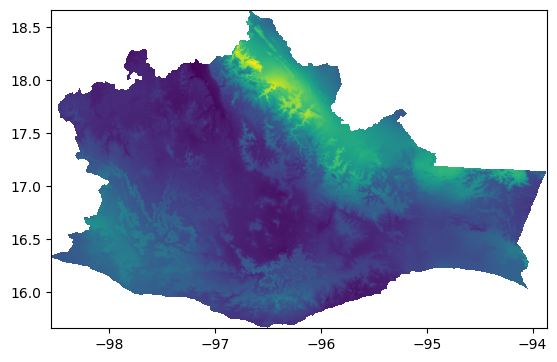

<Axes: >

In [4]:
im_3 = rasterio.open('area_cor3.tif')
plt.imshow(im_3.read(1))
show(im_3)

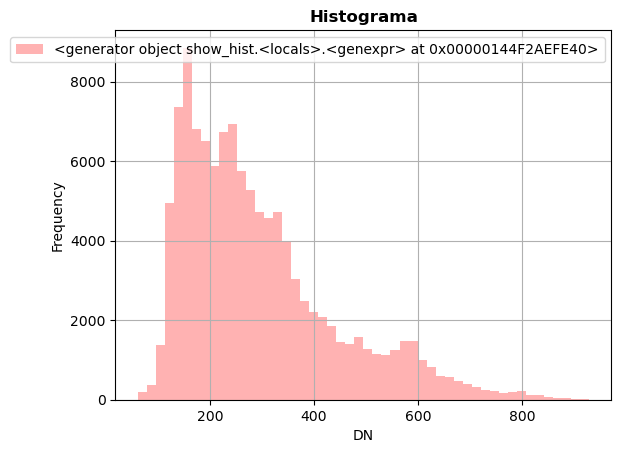

In [5]:
show_hist(im_3, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histograma")

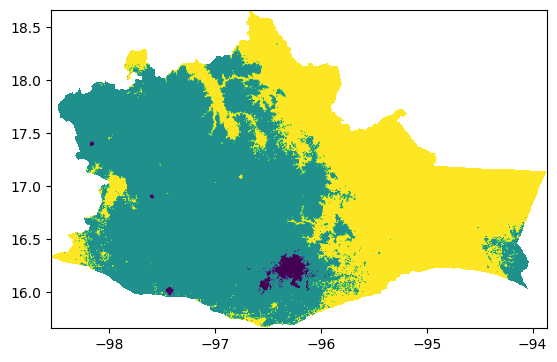

<Axes: >

In [6]:
im_4 = rasterio.open('area_cor4.tif')
plt.imshow(im_4.read(1))
show(im_4)

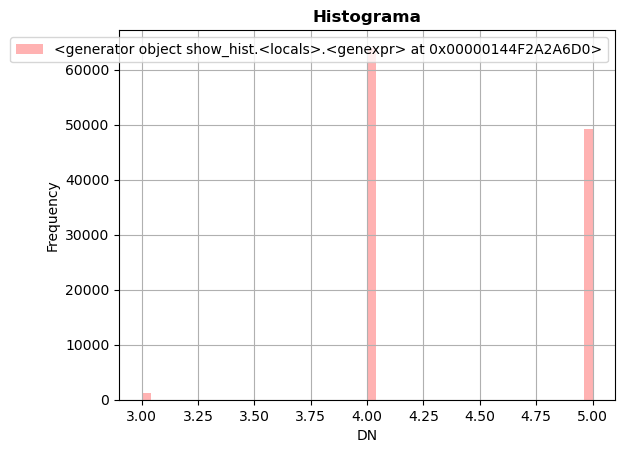

In [7]:
show_hist(im_4, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histograma")

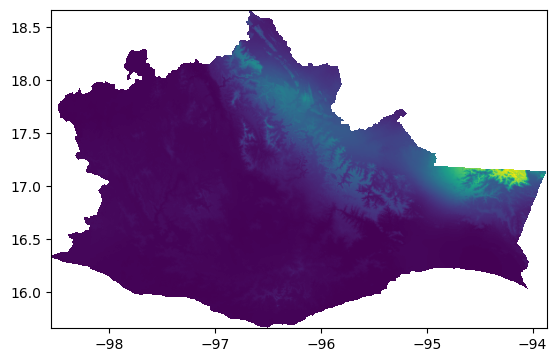

<Axes: >

In [8]:
im_5 = rasterio.open('area_cor5.tif')
plt.imshow(im_5.read(1))
show(im_5)

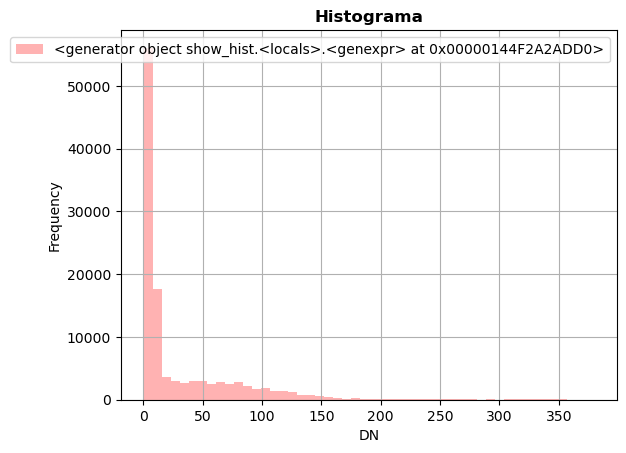

In [9]:
show_hist(im_5, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histograma")

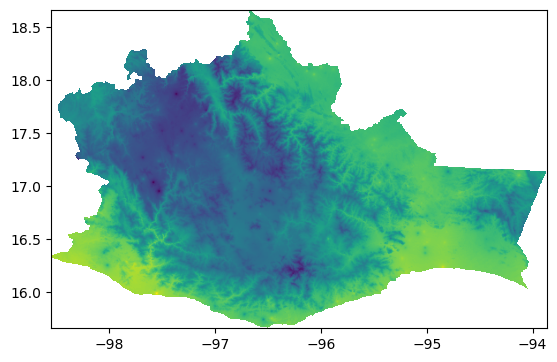

<Axes: >

In [10]:
im_6 = rasterio.open('area_cor6.tif')
plt.imshow(im_6.read(1))
show(im_6)

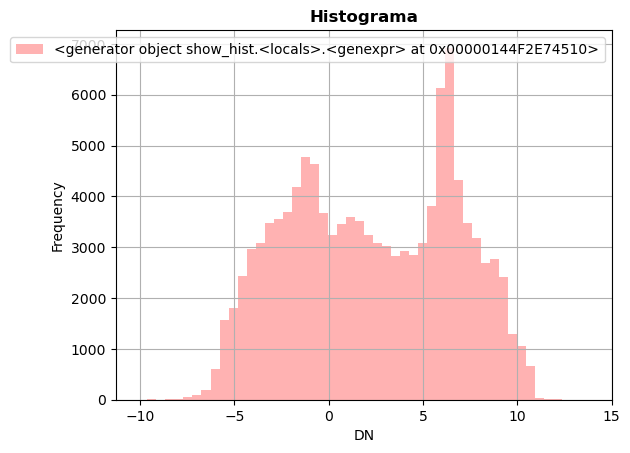

In [11]:
show_hist(im_6, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histograma")

# Datos de la zona 1

In [12]:
gdf = gpd.read_file('Datos cercas.gpkg')
gdf

X          Y    Z1                         geometry
0   16.873058 -94.723636  93.3  MULTIPOINT (-94.72364 16.87306)
1   16.872492 -94.722761  98.2  MULTIPOINT (-94.72276 16.87249)
2   16.872578 -94.722078  98.7  MULTIPOINT (-94.72208 16.87258)
3   16.873325 -94.721767  95.3  MULTIPOINT (-94.72177 16.87333)
4   16.872286 -94.721767  92.9  MULTIPOINT (-94.72177 16.87229)
5   16.871769 -94.721625  97.8  MULTIPOINT (-94.72163 16.87177)
6   16.870917 -94.721836  93.3  MULTIPOINT (-94.72184 16.87092)
7   16.870456 -94.721378  92.4  MULTIPOINT (-94.72138 16.87046)
8   16.869769 -94.721733  94.8  MULTIPOINT (-94.72173 16.86977)
9   16.868858 -94.721944  96.4  MULTIPOINT (-94.72194 16.86886)
10  16.868122 -94.722575  93.8  MULTIPOINT (-94.72258 16.86812)
11  16.867514 -94.723278  93.8  MULTIPOINT (-94.72328 16.86751)
12  16.866872 -94.723900  95.8  MULTIPOINT (-94.72390 16.86687)
13  16.882747 -94.723492  92.9  MULTIPOINT (-94.72349 16.88275)
14  16.881997 -94.722939  90.5  MULTIPOINT (-94.72294 16.88200)
15  16.881889 -94.722053  96.3  MULTIPOINT (-94.72205 16.88189)
16  16.881297 -94.722481  92.4  MULTIPOINT (-94.72248 16.88130)
17  16.872122 -94.723361  93.8  MULTIPOINT (-94.72336 16.87212)
18  16.871783 -94.723189  91.5  MULTIPOINT (-94.72319 16.87178)

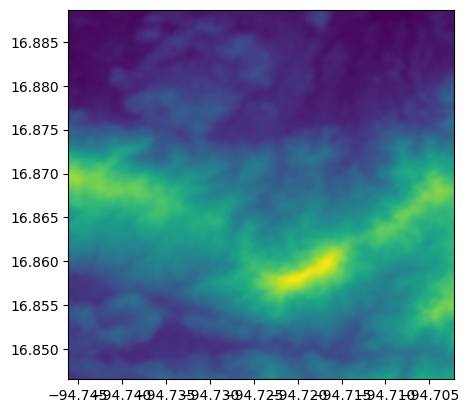

<Axes: >

In [13]:
dat1 = rasterio.open('datos_1.tif')
plt.imshow(dat1.read(1))
show(dat1)

# Datos de la zona 2

In [14]:
gdf2 = gpd.read_file('Datos lejos.gpkg')
gdf2

X          Y     Z1                         geometry
0   16.817678 -94.664383  94.80  MULTIPOINT (-94.66438 16.81768)
1   16.818603 -94.648583  89.38  MULTIPOINT (-94.64858 16.81860)
2   16.818475 -94.647539  89.32  MULTIPOINT (-94.64754 16.81847)
3   16.818961 -94.646797  88.66  MULTIPOINT (-94.64680 16.81896)
4   16.819378 -94.646622  84.23  MULTIPOINT (-94.64662 16.81938)
5   16.819736 -94.646472  89.21  MULTIPOINT (-94.64647 16.81974)
6   16.818072 -94.647711  95.30  MULTIPOINT (-94.64771 16.81807)
7   16.817325 -94.647356  95.80  MULTIPOINT (-94.64736 16.81733)
8   16.816767 -94.646672  96.80  MULTIPOINT (-94.64667 16.81677)
9   16.832922 -94.646008  96.30  MULTIPOINT (-94.64601 16.83292)
10  16.831981 -94.645675  98.40  MULTIPOINT (-94.64567 16.83198)
11  16.817628 -94.651381  95.80  MULTIPOINT (-94.65138 16.81763)
12  16.818175 -94.651775  97.80  MULTIPOINT (-94.65178 16.81818)
13  16.817739 -94.652347  94.30  MULTIPOINT (-94.65235 16.81774)
14  16.819319 -94.648950  90.02  MULTIPOINT (-94.64895 16.81932)
15  16.819467 -94.647769  88.95  MULTIPOINT (-94.64777 16.81947)
16  16.820456 -94.647792  88.19  MULTIPOINT (-94.64779 16.82046)
17  16.820106 -94.647586  87.20  MULTIPOINT (-94.64759 16.82011)
18  16.818614 -94.652122  90.80  MULTIPOINT (-94.65212 16.81861)

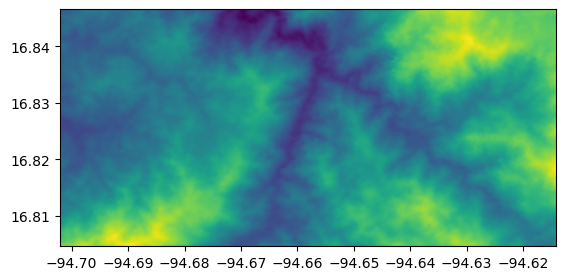

<Axes: >

In [15]:
dat2 = rasterio.open('datos_2.tif')
plt.imshow(dat2.read(1))
show(dat2)

# Vista general de la zona de estudio

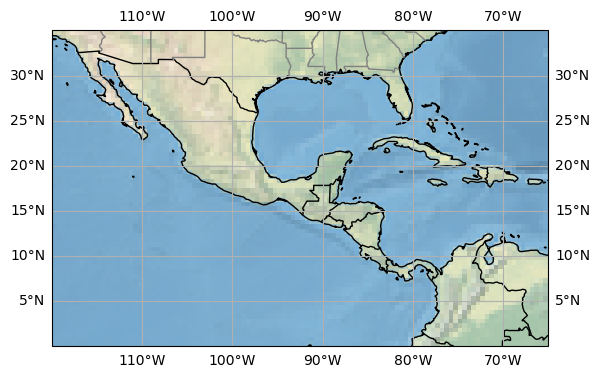

In [16]:
def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-120, -65, 0, 35], crs=ccrs.PlateCarree())

    ax.stock_img()


    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')


    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(states_provinces, edgecolor='gray')

    

    plt.show()


if __name__ == '__main__':
    main()

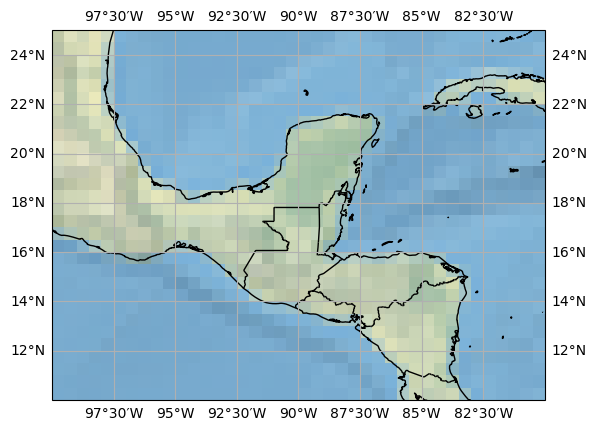

In [17]:
def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-100, -80, 10, 25], crs=ccrs.PlateCarree())
    ax.stock_img()

    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')


    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(states_provinces, edgecolor='gray')

    plt.show()


if __name__ == '__main__':
    main()

# Zona específica de trabajo:

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


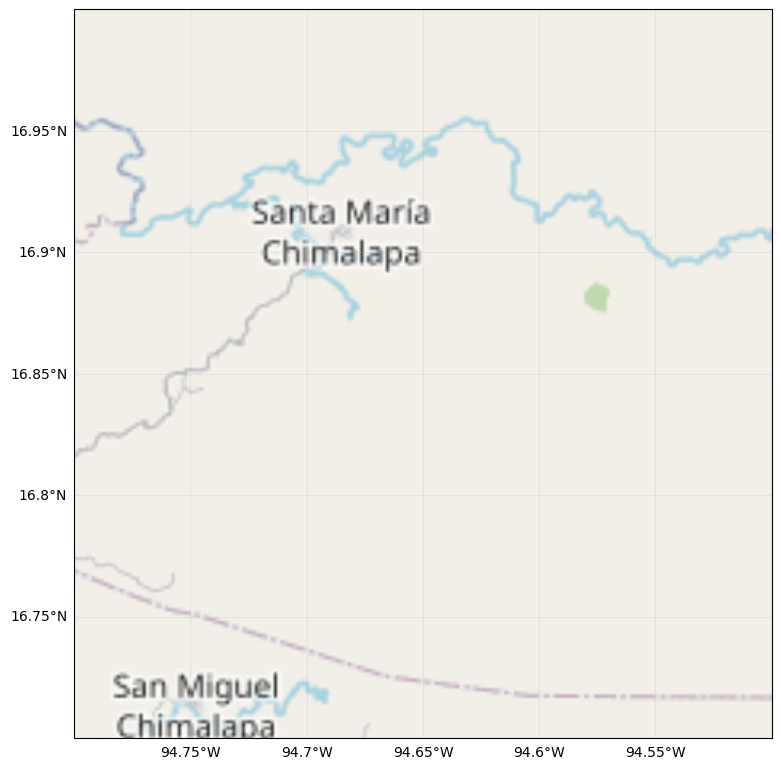

In [18]:
def main():
    
    extent=[-94.8, -94.5, 16.7, 17]
    request = cimgt.OSM()

    fig = plt.figure(figsize=(9, 13))
    ax = plt.axes(projection=request.crs)
    gl = ax.gridlines(draw_labels=True, alpha=0.2)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    ax.set_extent(extent)

    ax.add_image(request, 10, interpolation='bilinear')

    
    plt.show()
    
if __name__ == '__main__':
    main()

# Zona 1

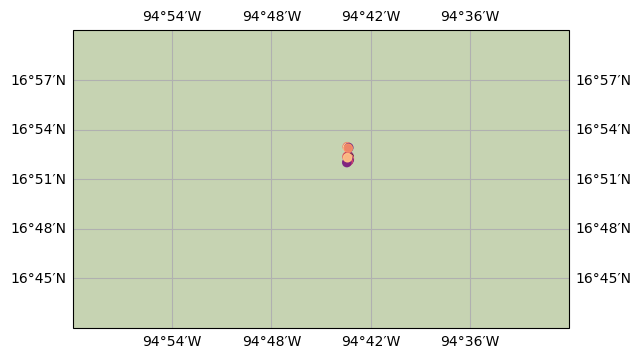

In [19]:
def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-95, -94.5, 16.7, 17], crs=ccrs.PlateCarree())

    ax.stock_img()

    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')


    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(states_provinces, edgecolor='gray')
    

    cl = ax.scatter(gdf.Y,gdf.X, c=gdf.Z1, alpha=0.9, cmap=plt.cm.magma_r)
    
    plt.show()
    
if __name__ == '__main__':
    main()

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\gstools\field\plot.py:406: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: title={'center': 'Field 2D structured: (50, 50)'}, xlabel='lon', ylabel='lat'>

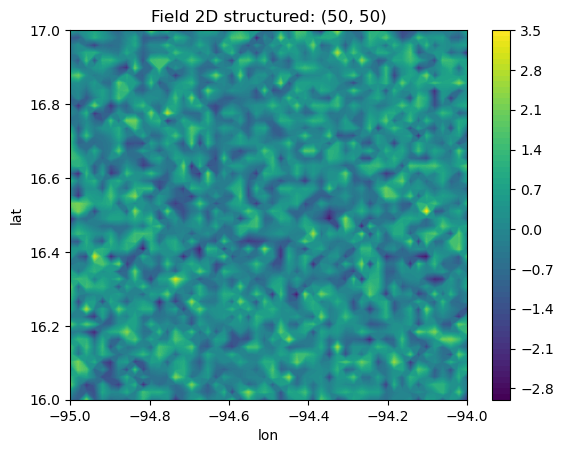

In [20]:
model = gs.Gaussian(latlon=True, len_scale=0.1, geo_scale=gs.KM_SCALE)

lat=np.linspace(-94, -95)
lon=np.linspace(16, 17)
srf = gs.SRF(model, seed=1234)
campo = srf.structured((lon, lat))
srf.plot()

Gaussian(latlon=True, var=0.99, len_scale=0.298, nugget=0.0, geo_scale=6.37e+03)


C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\gstools\covmodel\plot.py:166: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


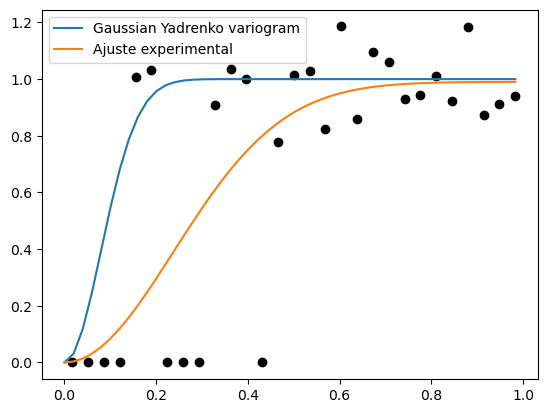

In [21]:
esquinas_ed = np.linspace(0, 1, 30)
bin_centro, emp_vario = gs.vario_estimate(
    (lat, lon),
    campo,
    esquinas_ed,
    latlon=True,
    mesh_type="structured",
    sampling_size=2000,
    sampling_seed=12345,
    geo_scale=gs.KM_SCALE)

ax = model.plot("vario_yadrenko", x_max=max(bin_centro))
model.fit_variogram(bin_centro, emp_vario, nugget=False)
model.plot("vario_yadrenko", ax=ax, label="Ajuste experimental", x_max=max(bin_centro))
ax.scatter(bin_centro, emp_vario, color="k")
print(model)

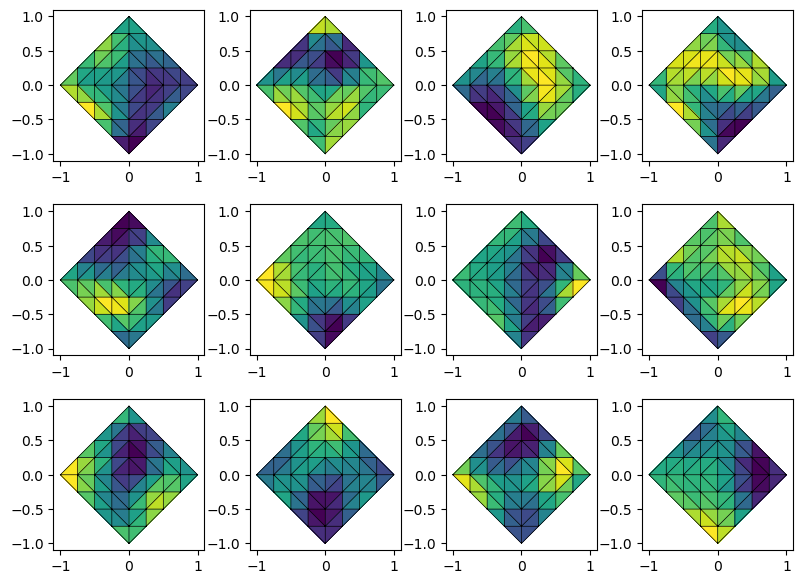

In [22]:
#creas las posibles mallas simuladas con los datos de R en la zona 1

puntos, celdas = meshzoo.ngon(4, 4)
mesh = meshio.Mesh(puntos, {"triangle": celdas})

# numero de campos

numero_campos = 12

# modelo que vamos ajustar

model = gs.Gaussian(dim=2, len_scale=0.5)
srf = gs.SRF(model, mean=1)

for i in range(numero_campos):
    srf.mesh(mesh, points="centroids", name=f"c-field-{i}", seed=i)

for i in range(numero_campos):
    srf.mesh(mesh, points="puntos", name=f"p-field-{i}", seed=i)


triangulation = tri.Triangulation(puntos[:, 0], puntos[:, 1], celdas)
# cargar la figura
cols = 4
filas = int(np.ceil(numero_campos / cols))
fig = plt.figure(figsize=[2 * cols, 2 * filas])
for i, field in enumerate(mesh.cell_data, 1):
    ax = fig.add_subplot(filas, cols, i)
    ax.tripcolor(triangulation, mesh.cell_data[field][0])
    ax.triplot(triangulation, linewidth=0.5, color="k")
    ax.set_aspect("equal")
fig.tight_layout()

# 

# Zona 2

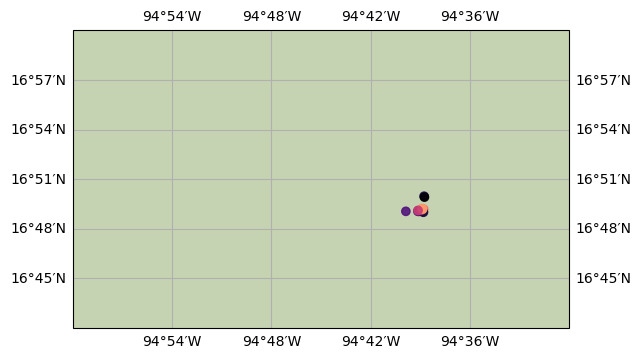

In [23]:
def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-95, -94.5, 16.7, 17], crs=ccrs.PlateCarree())

    ax.stock_img()

    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')


    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(states_provinces, edgecolor='gray')
    

    cl = ax.scatter(gdf2.Y,gdf2.X, c=gdf2.Z1, alpha=0.9, cmap=plt.cm.magma_r)
    
    plt.show()
    
if __name__ == '__main__':
    main()

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\gstools\field\plot.py:406: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: title={'center': 'Field 2D structured: (50, 50)'}, xlabel='lon', ylabel='lat'>

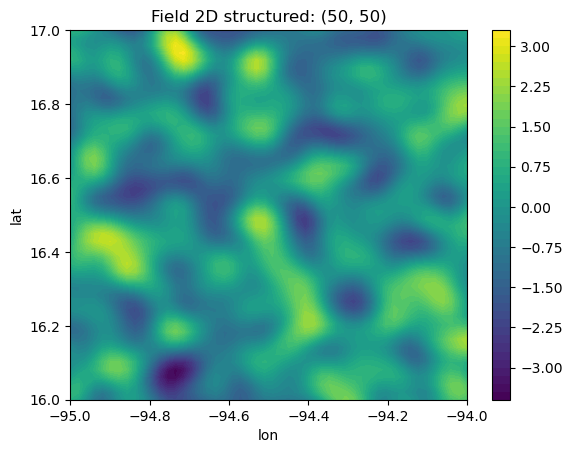

In [24]:
model2 = gs.Gaussian(latlon=True, len_scale=7, geo_scale=gs.KM_SCALE)

lat=np.linspace(-94, -95)
lon=np.linspace(16, 17)
srf2 = gs.SRF(model2, seed=1234)
field2 = srf2.structured((lon, lat))
srf2.plot()

Gaussian(dim=2, var=1.33, len_scale=0.644, nugget=0.0)


C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\gstools\covmodel\plot.py:166: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


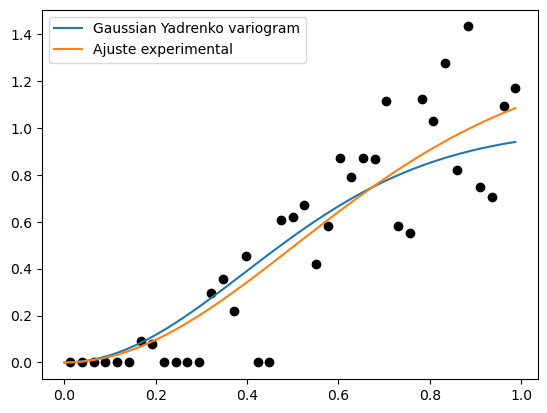

In [25]:
esquinas_ed2 = np.linspace(0, 1, 40)
bin_centro2, emp_vario = gs.vario_estimate(
    (lat, lon),
    field2,
    esquinas_ed2,
    latlon=True,
    mesh_type="structured",
    sampling_size=2000,
    sampling_seed=12345,
    geo_scale=gs.KM_SCALE)

ax = model.plot("vario_yadrenko", x_max=max(bin_centro2))
model.fit_variogram(bin_centro2, emp_vario, nugget=False)
model.plot("vario_yadrenko", ax=ax, label="Ajuste experimental", x_max=max(bin_centro2))
ax.scatter(bin_centro2, emp_vario, color="k")
print(model)

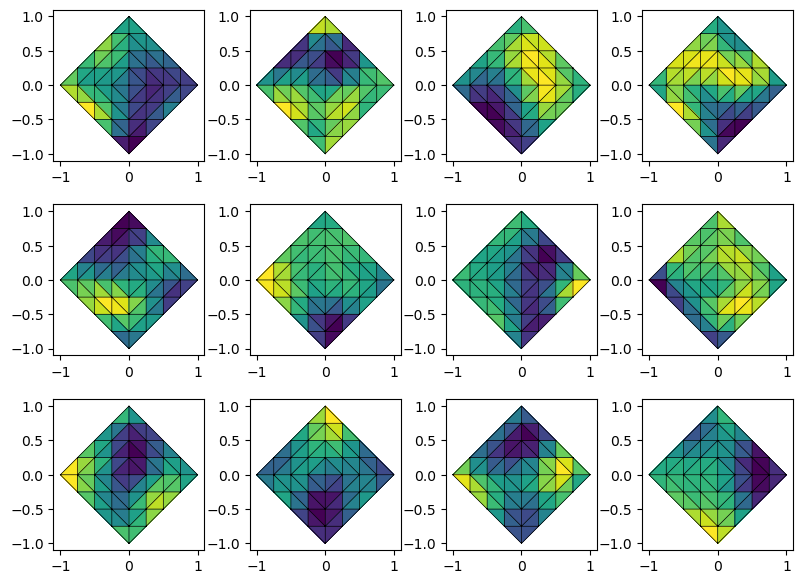

In [26]:
#creas las posibles mallas simuladas con los datos de R en la zona 1


puntos2, celdas2 = meshzoo.ngon(4, 4)
mesh = meshio.Mesh(puntos2, {"triangle": celdas2})

# number of campos

numero_campos2 = 12

# modelo que vamos ajustar

model = gs.Gaussian(dim=2, len_scale=0.5)
srf = gs.SRF(model, mean=1)

for i in range(numero_campos2):
    srf.mesh(mesh, points="centroids", name=f"c-field-{i}", seed=i)

for i in range(numero_campos2):
    srf.mesh(mesh, points="points", name=f"p-field-{i}", seed=i)


triangulation = tri.Triangulation(puntos2[:, 0], puntos2[:, 1], celdas2)

# cargar la figura
col2 = 4
filas2 = int(np.ceil(numero_campos2 / cols))
fig = plt.figure(figsize=[2 * col2, 2 * filas2])
for i, field in enumerate(mesh.cell_data, 1):
    ax = fig.add_subplot(filas2, col2, i)
    ax.tripcolor(triangulation, mesh.cell_data[field][0])
    ax.triplot(triangulation, linewidth=0.5, color="k")
    ax.set_aspect("equal")
fig.tight_layout()

In [27]:
#otra simulación dentro del área de estudio


l = 1000
x_movs = np.random.choice([-98, 94], size=l) + 0.2 * np.random.randn(l) #movimientos sobre las latitudes
y_movs = np.random.choice([-6, 18], size=l) + 0.2 * np.random.randn(l)  #movimientos sobre las longitudes
x_posicion = np.cumsum(x_movs) 
y_posicion = np.cumsum(y_movs) 

# figura de las simulaciones moviendose con rpedidción

fig = go.Figure(data=go.Scatter(
    x=x_posicion,
    y=y_posicion,
    mode='markers',
    name='Random Walk',
    marker=dict(
        color=np.arange(l),
        size=8,
        colorscale='Reds',
        showscale=True
    )
))

fig.show()